## Data Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("./data/survey_data.csv")

# Display the first few rows to understand the structure of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Visualizing Data Distributions


In [2]:
# Using IQR to remove outliers
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

Text(0.5, 1.0, 'Distribution of Yearly Compensation')

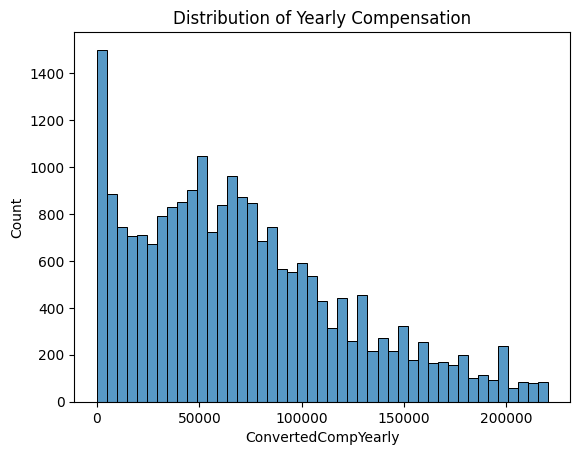

In [3]:
sns.histplot(data=df_no_outliers, x='ConvertedCompYearly')
plt.title('Distribution of Yearly Compensation')

##### 2. Box Plot of `Age`


In [ ]:
# Define mapping dictionary
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': np.nan  # Assign NaN for missing value handling
}

# Apply mapping to the DataFrame
df_no_outliers['Age_Numeric'] = df_no_outliers['Age'].map(age_mapping)


Text(0.5, 1.0, 'Distribution of Age')

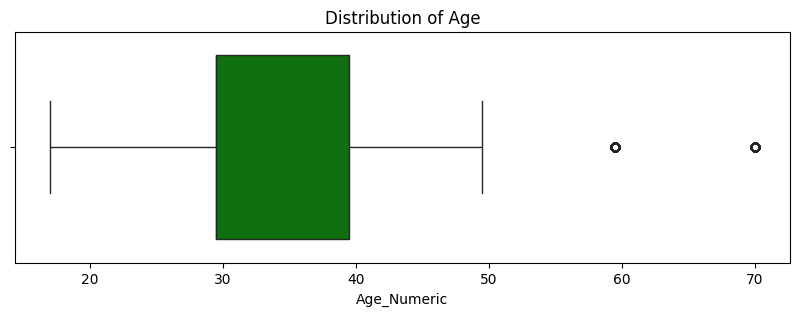

In [5]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df_no_outliers['Age_Numeric'], color='green')
plt.title('Distribution of Age')

### Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Text(0.5, 1.0, 'Correlation between Age and Yearly Compensation')

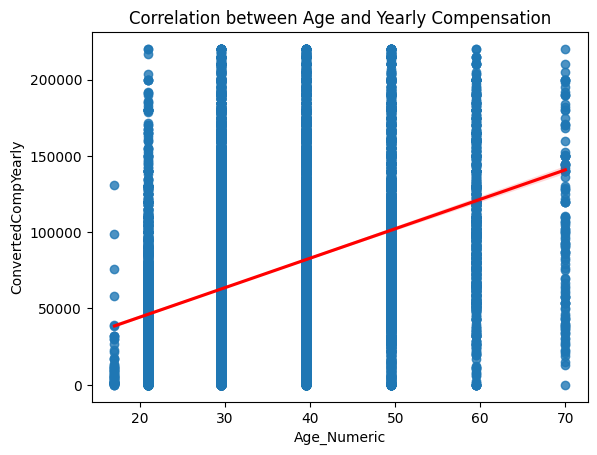

In [6]:
sns.regplot(data=df_no_outliers, x='Age_Numeric', y='ConvertedCompYearly', line_kws={'color': 'red'})
plt.title('Correlation between Age and Yearly Compensation')

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Text(0.5, 1.0, 'Relation between Yearly Compensation and Job Satisfaction Points and Age')

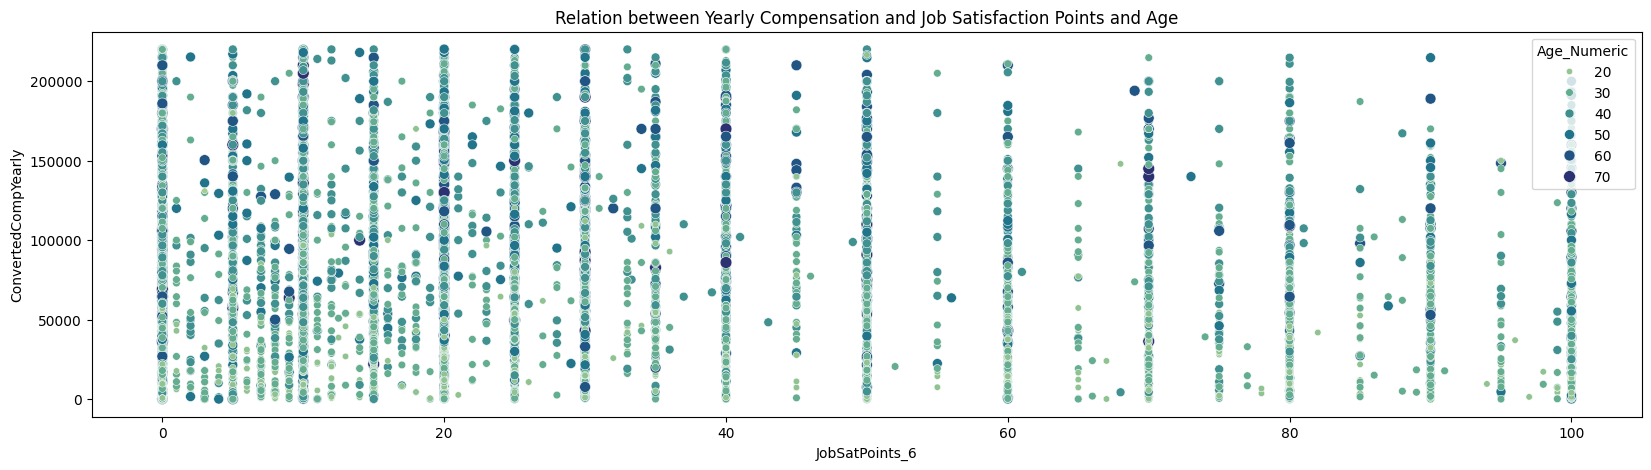

In [7]:
plt.figure(figsize=(20, 5))
sns.scatterplot(data=df_no_outliers, x='JobSatPoints_6', y='ConvertedCompYearly', size='Age_Numeric', hue='Age_Numeric', palette='crest')
plt.title('Relation between Yearly Compensation and Job Satisfaction Points and Age')

### Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



Text(0.5, 1.0, 'Count of each primary role')

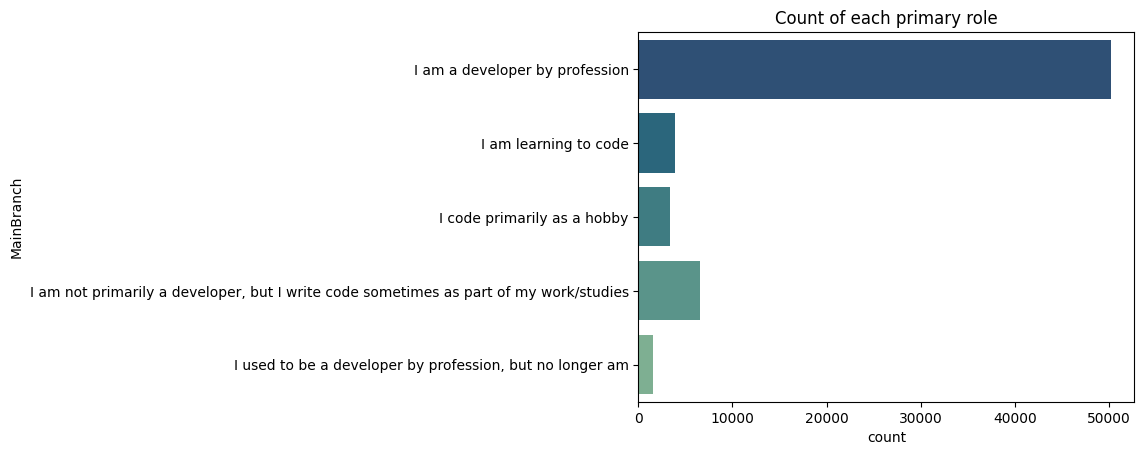

In [8]:
sns.countplot(data=df, y='MainBranch', hue='MainBranch', palette='crest_r', legend=False)
plt.title('Count of each primary role')

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



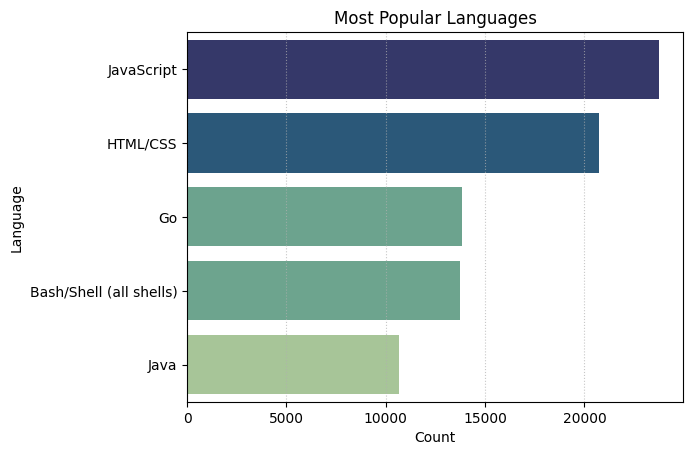

In [19]:
from collections import Counter

# Drop NaN values
df_databases = df['LanguageWantToWorkWith'].dropna()

# Split language lists into individual languages
db_list = [lang for sublist in df_databases.str.split(';') for lang in sublist]

# Count occurrences of each language
db_counts = Counter(db_list)

# Convert to DataFrame for better visualization
df_databases = pd.DataFrame(db_counts.items(), columns=['Language', 'Count'])

# Sort by count in descending order
df_databases = df_databases.head().sort_values(by='Count', ascending=False).reset_index(drop=True)

sns.barplot(data=df_databases, y='Language', x='Count', color='green', hue='Count', palette='crest', legend=False)
plt.title('Most Popular Languages')
plt.grid(axis='x', linestyle=':', alpha=0.7)

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


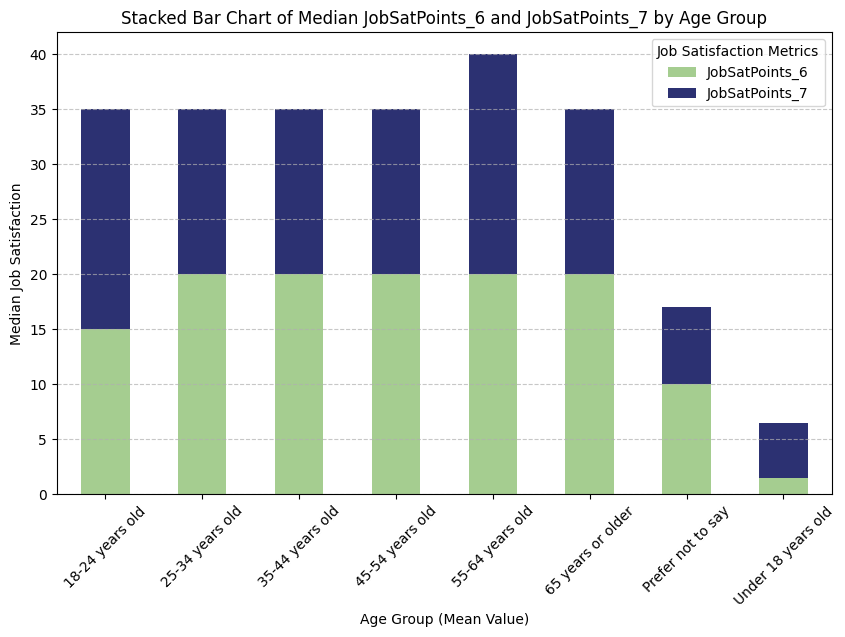

In [11]:
df_filtered = df.dropna(subset=['Age', 'JobSatPoints_6', 'JobSatPoints_7'])
median_satisfaction = df_filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()
median_satisfaction.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='crest')

plt.xlabel("Age Group (Mean Value)")
plt.ylabel("Median Job Satisfaction")
plt.title("Stacked Bar Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group")
plt.legend(title="Job Satisfaction Metrics")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



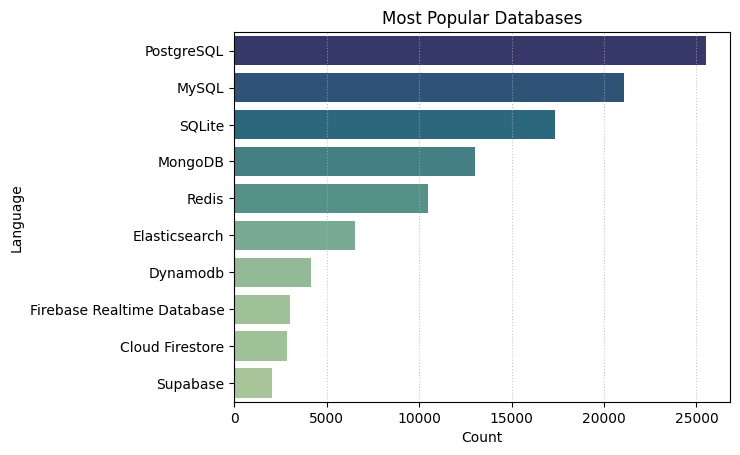

In [14]:
from collections import Counter

# Drop NaN values
df_databases = df['DatabaseHaveWorkedWith'].dropna()

# Split language lists into individual languages
db_list = [lang for sublist in df_databases.str.split(';') for lang in sublist]

# Count occurrences of each language
db_counts = Counter(db_list)

# Convert to DataFrame for better visualization
language_df = pd.DataFrame(db_counts.items(), columns=['Language', 'Count'])

# Sort by count in descending order
language_df = language_df.head(10).sort_values(by='Count', ascending=False).reset_index(drop=True)

sns.barplot(data=language_df, y='Language', x='Count', color='green', hue='Count', palette='crest', legend=False)
plt.title('Most Popular Databases')
plt.grid(axis='x', linestyle=':', alpha=0.7)

### Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



Text(0.5, 1.0, 'Median Yearly Compensation by Age')

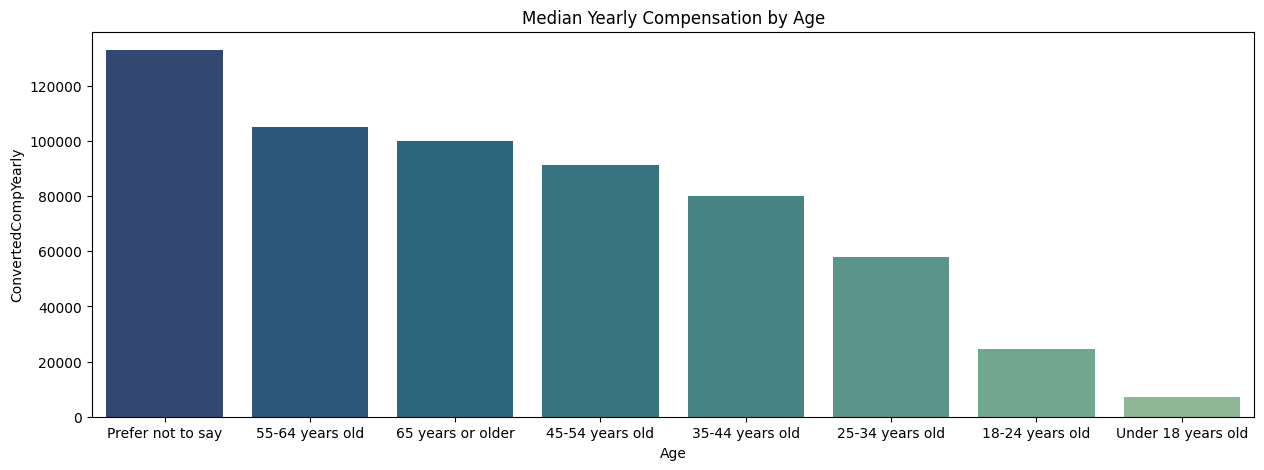

In [50]:
median_comp = df_no_outliers.groupby('Age')['ConvertedCompYearly'].median().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(data=median_comp, x='Age', y='ConvertedCompYearly', palette='crest_r', hue='Age')
plt.title('Median Yearly Compensation by Age')

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



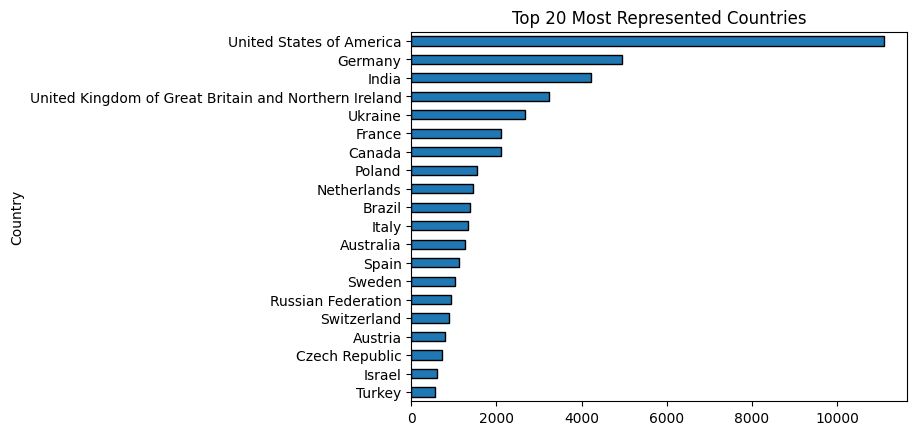

In [49]:
df_country = df.groupby('Country')['Country'].count().sort_values().tail(20).plot(kind='barh', edgecolor='black', title='Top 20 Most Represented Countries')